# Periodgram Smoothing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#pip freeze > requirements.txt

# Primer boludeo con AR(1) para ganar feeling

In [3]:
""" total_points = 3000

A = 0.95
den = [1, -A]
num = [1]
ar_sys = signal.TransferFunction(num, den, dt = 1)

mean = 0
std = 2
e = np.random.normal(mean, std, total_points)

tout, yout = signal.dlsim(ar_sys, e)

plt.figure()

plt.plot(tout, yout, linestyle='-', color='b')
plt.plot(tout, e, linestyle='-', color='r')
plt.title('Gaussian Random Sequence Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show() """



" total_points = 3000\n\nA = 0.95\nden = [1, -A]\nnum = [1]\nar_sys = signal.TransferFunction(num, den, dt = 1)\n\nmean = 0\nstd = 2\ne = np.random.normal(mean, std, total_points)\n\ntout, yout = signal.dlsim(ar_sys, e)\n\nplt.figure()\n\nplt.plot(tout, yout, linestyle='-', color='b')\nplt.plot(tout, e, linestyle='-', color='r')\nplt.title('Gaussian Random Sequence Over Time')\nplt.xlabel('Time')\nplt.ylabel('Value')\nplt.grid(True)\nplt.show() "

In [4]:
""" corr = np.correlate(yout[:, 0], yout[:, 0], mode = 'full')
ryy_biased = corr / total_points
ryy_unbiased_normalized = np.array([corr[x] / (total_points - np.abs(total_points-1 - x)) for x in range(0, len(corr))]) /  ryy_biased[total_points-1]
ryy_biased_normalized = ryy_biased /  ryy_biased[total_points-1]
n = np.arange(0, total_points+1)
ryy_teo = pow(A, n)

plt.plot(np.arange(-(total_points-1), total_points), ryy_biased_normalized, linestyle='-', color='b')
#plt.plot(np.arange(-(total_points-1), total_points), ryy_unbiased_normalized, linestyle='-', color='g')
plt.plot(n, ryy_teo, linestyle='-', color='r')
plt.title('biased vs teorico AR(1)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.xlim(-150, 150)
plt.show() """

" corr = np.correlate(yout[:, 0], yout[:, 0], mode = 'full')\nryy_biased = corr / total_points\nryy_unbiased_normalized = np.array([corr[x] / (total_points - np.abs(total_points-1 - x)) for x in range(0, len(corr))]) /  ryy_biased[total_points-1]\nryy_biased_normalized = ryy_biased /  ryy_biased[total_points-1]\nn = np.arange(0, total_points+1)\nryy_teo = pow(A, n)\n\nplt.plot(np.arange(-(total_points-1), total_points), ryy_biased_normalized, linestyle='-', color='b')\n#plt.plot(np.arange(-(total_points-1), total_points), ryy_unbiased_normalized, linestyle='-', color='g')\nplt.plot(n, ryy_teo, linestyle='-', color='r')\nplt.title('biased vs teorico AR(1)')\nplt.xlabel('Time')\nplt.ylabel('Value')\nplt.grid(True)\nplt.xlim(-150, 150)\nplt.show() "

In [5]:
""" plt.plot(np.arange(-(total_points-1), total_points), ryy_biased_normalized, linestyle='-', color='b')
plt.plot(np.arange(-(total_points-1), total_points), ryy_unbiased_normalized, linestyle='-', color='g')
plt.title('biased vs unbiased')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.xlim(1500, 3000)
plt.show() """

" plt.plot(np.arange(-(total_points-1), total_points), ryy_biased_normalized, linestyle='-', color='b')\nplt.plot(np.arange(-(total_points-1), total_points), ryy_unbiased_normalized, linestyle='-', color='g')\nplt.title('biased vs unbiased')\nplt.xlabel('Time')\nplt.ylabel('Value')\nplt.grid(True)\nplt.xlim(1500, 3000)\nplt.show() "

# Listo con el boludeo
----


# Periodogram classic

In [2]:
from scipy import fft

def periodogram(x, N_FFT):
    w = fft.fftshift(fft.fftfreq(N_FFT, d=1.0)) * 2 * np.pi
    periodogram = np.abs(fft.fftshift(fft.fft(x, n = N_FFT)))**(2) / len(x) 
    return periodogram, w 


In [4]:
def biased_autocorr(x): 
    corr = np.correlate(x, x, mode = 'full')
    rxx_biased = corr / len(x)
    return rxx_biased

def biased_xcorr(x, y):
    xcorr = np.correlate(x, y, mode = 'full')
    rxy_biased = xcorr / len(x)
    return rxy_biased

def unbiased_autocorr(x):
    corr = np.correlate(x, x, mode = 'full')
    rxx_unbiased = np.array([corr[n] / (len(x) - np.abs(len(x) - 1 - n)) for n in range(0, len(corr))])
    return rxx_unbiased

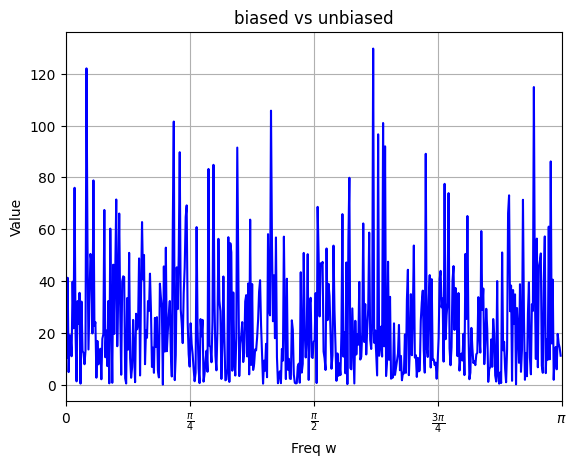

In [8]:
mean = 0
std = 5
noise = np.random.normal(mean, std, 1000) # Ruido blanco gaussiano

p, w = periodogram(noise, 1000)

plt.plot(w, p, linestyle='-', color='b')
plt.title('biased vs unbiased')
plt.xlabel('Freq w')
plt.ylabel('Value')
pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)
pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xticks(pi_ticks, pi_labels)
plt.xlim(0, np.pi)
plt.grid(True)
plt.show()

22.116276637417396
24.097723909097184


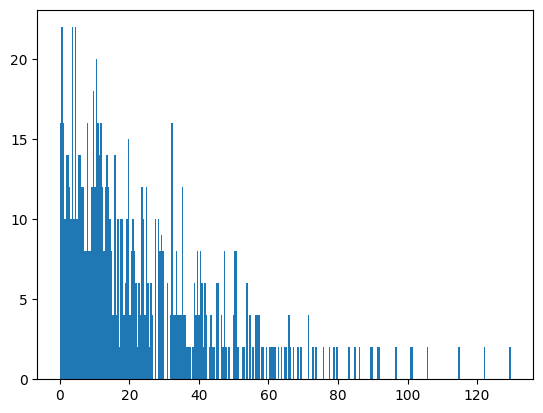

In [9]:
plt.hist(p, bins = 300)
print(np.std(p))
print(np.mean(p))

**NOTAR QUE EL STD DA LO MISMO QUE LO QUE DICE LA TEORIA, AUNQUE NO ES UNA GAUSSIANA**
---
Ahora veamos la performance del biased y unbiased

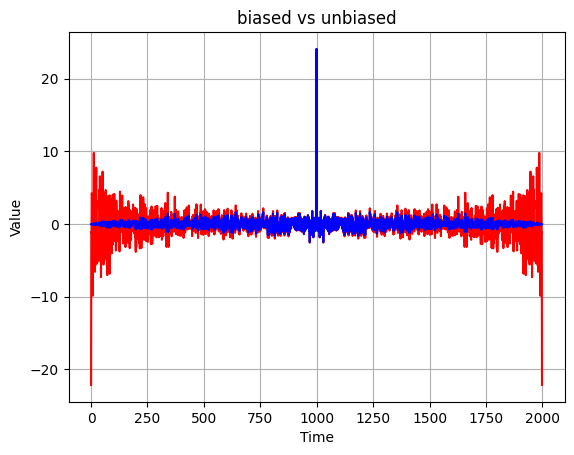

In [10]:
x = biased_autocorr(noise)
y = unbiased_autocorr(noise)
plt.plot(y, linestyle='-', color='r')
plt.plot(x, linestyle='-', color='b')
plt.title('biased vs unbiased')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

**Notar el efecto del ruido amplicado**

# Periodogram Smoothing

In [5]:
# x: datos de tamaño N
# L: Siendo (L-1) tamaño del lag máximo de autocorrelación i.e. Rxx(l > |L-1|) = 0
# N_FFT: La cantidad de puntos que se usa en la FFT para visualizar el periodograma. Notar que en clase solemos hacerlo con N, pero podemos
# usar un valor mas chico a N para no hacerlo tan pesado al plot, aunque siempre debe ser mas grande que 2L-1 claramente. 
# Elegir N_FFT != N no "cambia" nada, simplemente se interpola con menos puntos
def periodogram_smoothing(x, L, N_FFT):

    if N_FFT < 2*L-1:
        raise Exception("N_FFT < len(x)")     

    N = len(x)
    rxx = biased_autocorr(x) # 2N - 1 de largo
    offset = N - 1 
    rxx = rxx[offset - (L-1) : offset + (L-1) + 1] # autocorr ventaneada o windowed con L
    window = signal.get_window(window="bartlett", Nx=2*L-1, fftbins= False) 
    rxx_windowed = rxx*window

    Rxx = np.abs(fft.fftshift(fft.fft(rxx_windowed, n = N_FFT))) # (*) ver MARKDOWN ABAJO
    w = fft.fftshift(fft.fftfreq(N_FFT, d=1.0)) * 2 * np.pi

    return Rxx, w


(*) No deberia ser necesario aplicar abs, dado que siempre es positiva la ventana triangular o la de parzen, pero dado que contiene componentes imaginarias el abs debera ser aplicado. La DTFT sobre la triangular no aparece complejos, pero la DFT se puede pensar como un muestreo de la DTFT, pero SHIFTEADO en tiempo, (ver definicion de DFT), este shifteo en tiempo en frecuencia le agrega un fasor complejo, que no afecta el modulo, pero te mete complejos. 

In [5]:
Rxx, w = periodogram_smoothing(noise[0:1000], 5, 2000)

print(len(Rxx))
# plt.plot(rxx)
# plt.plot(window)
plt.plot(w, Rxx)

plt.title('Periodogram Smoothing')

pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)
pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xticks(pi_ticks, pi_labels)
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(0, np.pi)
plt.grid(True)
plt.show()

NameError: name 'noise' is not defined

In [13]:
def pulse(n, M):
    return np.array([1 if (np.abs(nVal) <= (M-1)/2) else 0 for nVal in n])

# Periodogram Averaging

In [6]:
def periodogram_averaging(x, L, D, N_FFT): # procurar que N_FFT > 2L-1
    N = len(x)
    num_segmentos = (N - L)//D      # Cantidad de segmentos con largo L
    Rx = np.zeros(N_FFT)
    for i in range(0, num_segmentos):
        x_seg = x[i*D : i*D + L]
        Rx += 1/L * np.abs(fft.fftshift(fft.fft(x_seg, N_FFT)))**2

    Rx = Rx/num_segmentos
    w = fft.fftshift(fft.fftfreq(N_FFT, d=1.0)) * 2 * np.pi
    return Rx, w

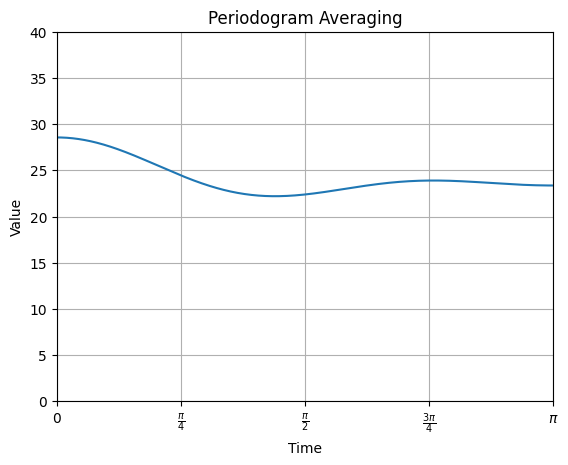

In [15]:
Rxx, w = periodogram_averaging(noise, 4, 4, 1000)

plt.plot(w, Rxx)
plt.title('Periodogram Averaging')

pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)
pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xticks(pi_ticks, pi_labels) 

plt.xlabel('Time')
plt.ylabel('Value')
plt.ylim(0,40)
plt.xlim(0, np.pi)
plt.grid(True)
plt.show()

# DATASET L1 32 SEC 4K

In [17]:
import h5py

def dump_info(name, obj):
    print("{0} :".format(name))
    try:
        print("   .value: {0}".format(obj[()]))
        for key in obj.attrs.keys():
            print("     .attrs[{0}]:  {1}".format(key, obj.attrs[key]))
    except:
        pass

filename = 'H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5'
file = h5py.File(filename, 'r')
file.visititems(dump_info)

meta :
meta/Description :
   .value: b'Strain data time series from LIGO'
meta/DescriptionURL :
   .value: b'http://www.gw-openscience.org/'
meta/Detector :
   .value: b'H1'
meta/Duration :
   .value: 32
meta/GPSstart :
   .value: 1126259447
meta/Observatory :
   .value: b'H'
meta/Type :
   .value: b'StrainTimeSeries'
meta/UTCstart :
   .value: b'2015-09-14T09:50:30'
quality :
quality/detail :
quality/injections :
quality/injections/InjDescriptions :
   .value: [b'Passes NO_CBC_HW_INJ test' b'Passes NO_BURST_HW_INJ test'
 b'Passes NO_DETCHAR_HW_INJ test' b'Passes NO_CW_HW_INJ test'
 b'Passes NO_STOCH_HW_INJ test']
quality/injections/InjShortnames :
   .value: [b'NO_CBC_HW_INJ' b'NO_BURST_HW_INJ' b'NO_DETCHAR_HW_INJ' b'NO_CW_HW_INJ'
 b'NO_STOCH_HW_INJ']
quality/injections/Injmask :
   .value: [31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31]
     .attrs[Bits]:  5
     .attrs[Description]:  A bitmask encoded as an integer-valued timeseries

In [18]:
dset = file['strain/Strain'][()]
fs = 1 / file['strain/Strain'].attrs['Xspacing']
print(fs)

4096.0


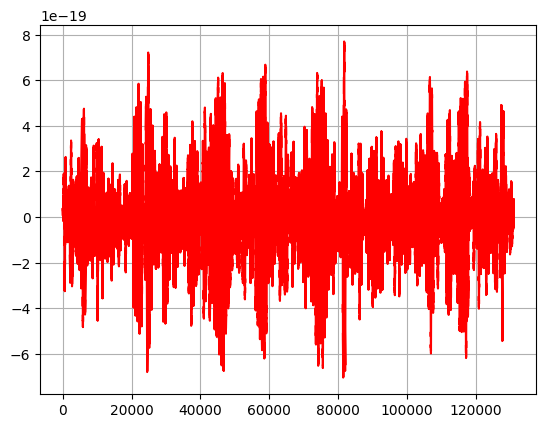

In [19]:
plt.close()
plt.figure()
plt.plot(dset, color = 'red')
plt.grid()
plt.show()

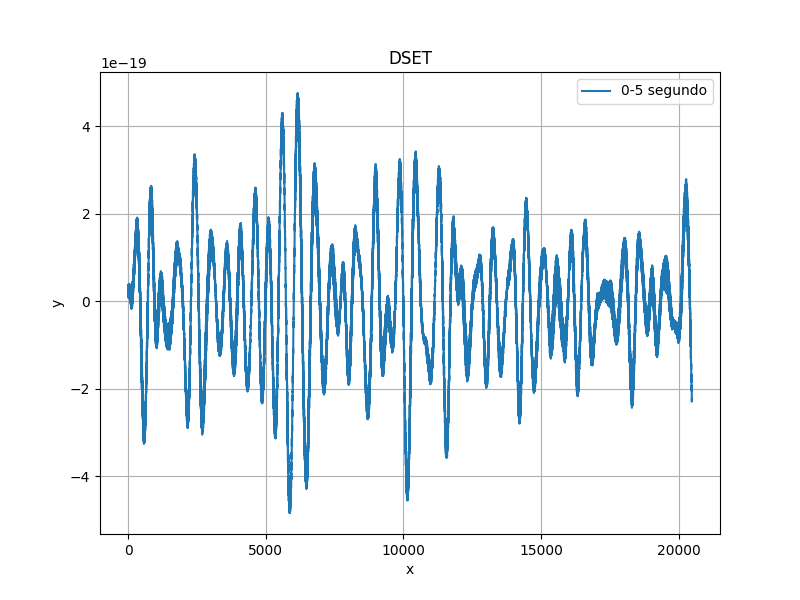

In [246]:
plt.figure(figsize=(8, 6))
plt.plot(dset[int(0*fs): int(5*fs)], label='0-5 segundo')
plt.title('DSET')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Evento es considerado que ocurre entre 14 y 20 segundos

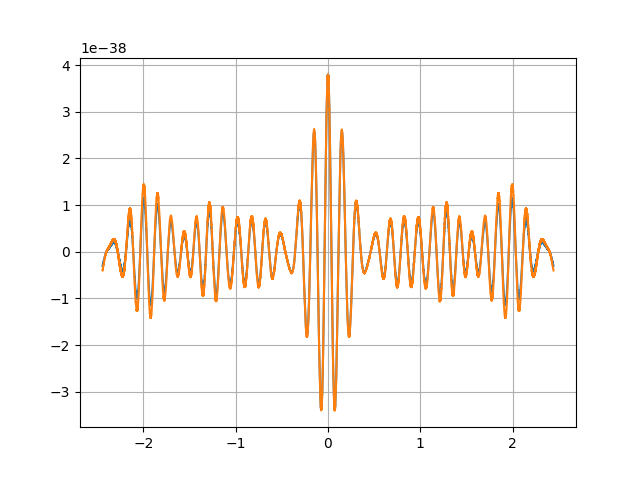

In [301]:

noise1 = dset[:int(14*fs)]
noise2 = dset[int(20*fs):int(32*fs)-1]
L = 10000
N = L*4
L_2 = L
offset = N - 1 
plt.cla()
rxx = biased_autocorr(noise1[:N] - np.mean(noise1[:N]))
rxx_un = unbiased_autocorr(noise1[:N] - np.mean(noise1[:N]))

rxx = rxx[offset - (L_2-1) : offset + (L_2-1) + 1] # autocorr ventaneada o windowed con L
rxx_un = rxx_un[offset - (L_2-1) : offset + (L_2-1) + 1]
lags = np.arange(-(L_2-1), (L_2-1) + 1) / fs
#f = 4*np.sinc(lags/30e-3)*1e-38
#plt.plot(lags, f)
plt.plot(lags, rxx)
plt.plot(lags, rxx_un)
plt.grid(True)
plt.show()
# plt.figure()

# Periodograma comúm

In [20]:
%matplotlib ipympl

Segundos de L =  4.0
Segundos de N =  16.0
Size N =  65536


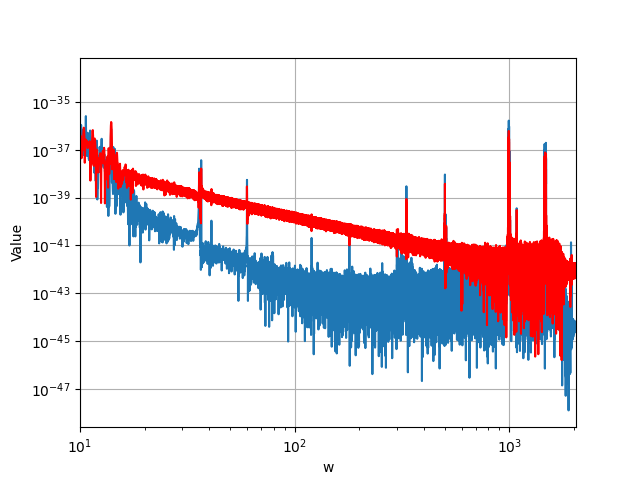

In [463]:

noise1 = dset[:int(14*fs)]

L_seg = 4
L = int(L_seg*fs)
print('Segundos de L = ', L/fs)
N = L*4
print('Segundos de N = ', N/fs)
print('Size N = ', N)

plt.close()
plt.figure()
noisea = noise1[0:N]
Rxx, w = periodogram(dset, 100000)
plt.cla()
w = w * fs / (2*np.pi)
plt.plot(w, Rxx)
Rxx2, w2 = periodogram(dset[int(26*fs):], 100000)
w2 = w2 * fs / (2*np.pi)
plt.plot(w2, Rxx2, color = 'r')
#Rxx2, w2 = periodogram(dset, 100000)
#plt.plot(w2, Rxx2, color = 'red')
#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)
#pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
#plt.xticks(pi_ticks, pi_labels)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('w')
plt.ylabel('Value')
plt.xlim(10, fs/2)
plt.grid(True)
plt.show()

# Periodogram Smoothing

Segundos de L =  5.0
Numero de samples de L =  20480
Segundos de N =  15.0
Size N =  61440
Resolucion Espectral en Hz 0.4


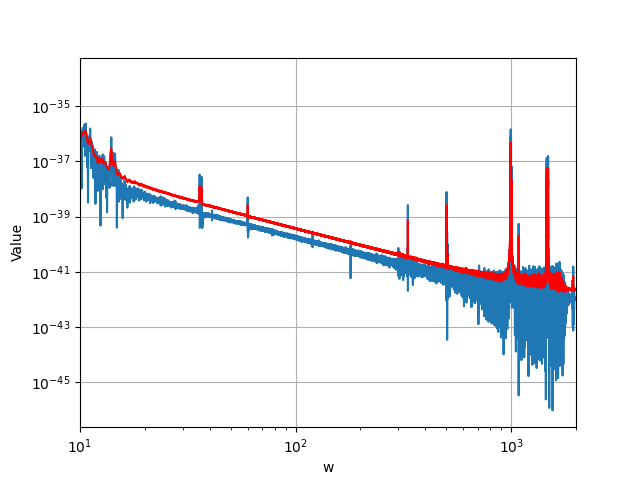

In [471]:
noise1 = dset[:int(14*fs)]

L_seg = 5
L = int(L_seg*fs)
print('Segundos de L = ', L/fs)
print('Numero de samples de L = ', L)
N = int(fs*L_seg*3)
print('Segundos de N = ', N/fs)
print('Size N = ', N)
print('Resolucion Espectral en Hz', 2/L_seg)
noisea = noise1[0:N]
plt.figure()
try:
    Rxx, w = periodogram_smoothing(noisea, L, N)
except CustomException as e:
    print("Custom exception caught:", e)

Rxx2, w2 = periodogram(noisea, 100000)
w2 = w2 * fs / (2*np.pi)

plt.cla()
w = w * fs / (2*np.pi)
plt.xscale('log')
plt.yscale('log')
plt.plot(w2, Rxx2)
plt.plot(w, Rxx, color = 'r')
#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)
#pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
#plt.xticks(pi_ticks, pi_labels)
plt.xlabel('w')
plt.ylabel('Value')
plt.xlim(10, 2000)
#plt.ylim(-850, -750)
#plt.xlim(0, np.pi)
plt.grid(True)
plt.show()

In [287]:
event_time = 1126259462
start_time = file['quality/injections/Injmask'].attrs['Xstart']
te = int((event_time-start_time)*fs)
event_samples = dset[te-int(L_seg*fs):te+int(L_seg*fs)]

In [487]:
import scipy.interpolate as inter

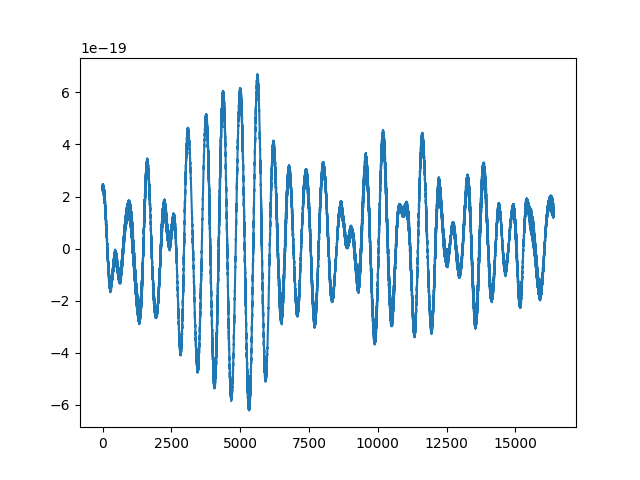

In [288]:
plt.figure()
plt.plot(event_samples)
plt.show()

# Whitening Posta 

Segundos de L =  2.0
Numero de samples de L =  8192
Segundos de N =  8.0
Size N =  32768
Resolucion Espectral en Hz 1.0
1.1330423663948404


c:\Users\sch_b\OneDrive\Documentos\PASA\.PASA\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\sch_b\OneDrive\Documentos\PASA\.PASA\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


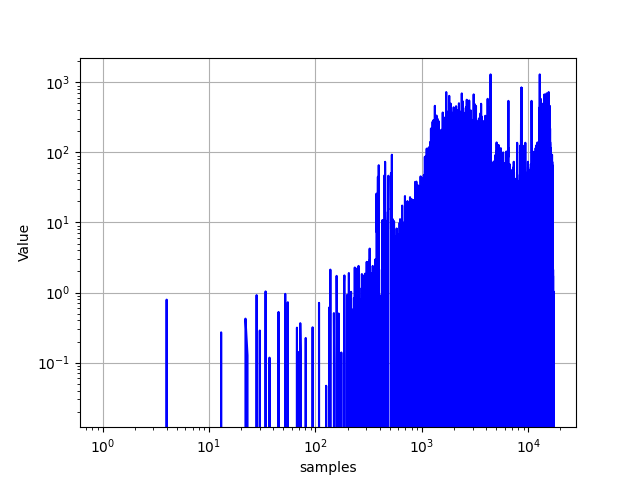

In [500]:
from IPython.display import Audio

L_seg = 2

event_time = 1126259462
start_time = file['quality/injections/Injmask'].attrs['Xstart']
dominio = (np.arange(0, len(event_samples)) + np.ones(len(event_samples)))*start_time
te = int((event_time-start_time)*fs)
event_samples = dset[te-int((L_seg+0.1)*fs):te+int((L_seg+0.1)*fs)]
Nt = len(event_samples)

L = int(L_seg*fs)
print('Segundos de L = ', L/fs)
print('Numero de samples de L = ', L)
N = int(fs*L_seg*4)
print('Segundos de N = ', N/fs)
print('Size N = ', N)
print('Resolucion Espectral en Hz', 2/L_seg)
noisea = noise1[0:N]
plt.figure()
try:
    Rxx, w = periodogram_smoothing(noisea, L, Nt)
except CustomException as e:
    print("Custom exception caught:", e)

# take the fourier transform of the data
freqs = fft.fftshift(fft.fftfreq(Nt, 1))
dwindow = signal.get_window(window="bartlett", Nx=Nt, fftbins= False) 
# whitening: transform to freq domain, divide by square root of psd, then
# transform back, taking care to get normalization right.
hf = fft.fftshift(fft.fft(event_samples))
norm = 1./np.sqrt(1./(1*2))
interpoler = inter.interp1d(w2/fs, Rxx2)
white_hf = hf / np.sqrt(interpoler(freqs)) * norm
white_ht = fft.ifft(fft.ifftshift(white_hf), n=Nt)

plt.close()
plt.figure()
plt.cla()

filtered_signal = sosfilt(sos, white_ht)
print(np.std(white_ht))

#plt.plot(white_ht , color = 'r')
plt.plot(white_hf, color = 'b')
plt.xscale('log')
plt.yscale('log')
#plt.plot( (event_samples - np.mean(event_samples))/ np.max((event_samples - np.mean(event_samples))), color = 'b' )


Audio((white_ht - np.mean(white_ht))/ np.max((white_ht - np.mean(white_ht))), rate=fs)
#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)
#pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
#plt.xticks(pi_ticks, pi_labels)
plt.xlabel('samples')
plt.ylabel('Value')
#plt.xlim(int(len(event_samples)/2) - int(0.1*fs), int(len(event_samples)/2) + int(0.1*fs))
#plt.xlim(100, 1000)
#plt.ylim(-850, -750)
#plt.xlim(0, np.pi)
plt.grid(True)
plt.show()

In [407]:
len(event_samples)/2

12697.0

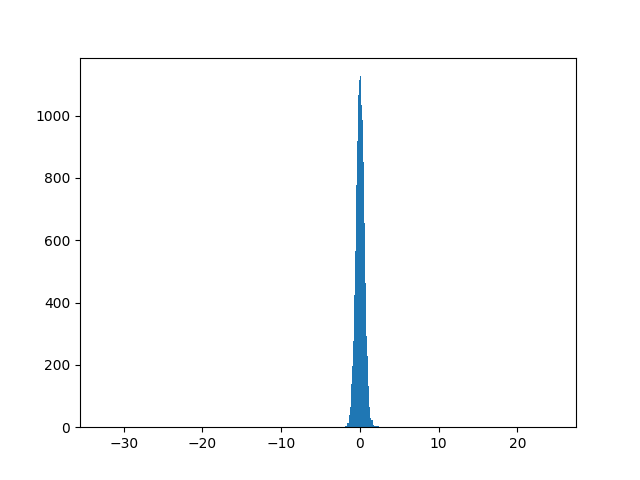

0.6199137024323301
(0.026864507334171523-5.903018940389612e-19j)


In [378]:
plt.close()
plt.figure()
plt.hist(np.real(white_ht), bins = 1000)
plt.show()
plt.xlim(-2,2)
print(np.std(white_ht))
print(np.mean(white_ht))

In [26]:
""" plt.figure()
plt.cla()
plt.xscale('log')
plt.plot(w, 10*np.log(1 / np.sqrt(Rxx) * norm), color = 'b')
plt.plot(w, 10*np.log(np.abs(hf)), color = 'r')
#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)
#pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
#plt.xticks(pi_ticks, pi_labels)
plt.xlabel('w')
plt.ylabel('Value')
#plt.xlim(0, 40)
#plt.ylim(-850, -750)
#plt.xlim(0, np.pi)
plt.grid(True)
plt.show() """

" plt.figure()\nplt.cla()\nplt.xscale('log')\nplt.plot(w, 10*np.log(1 / np.sqrt(Rxx) * norm), color = 'b')\nplt.plot(w, 10*np.log(np.abs(hf)), color = 'r')\n#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)\n#pi_labels = [r'$-\\pi$', r'$-\x0crac{3\\pi}{4}$', r'$-\x0crac{3\\pi}{2}$',r'$-\x0crac{\\pi}{4}$', '0', r'$\x0crac{\\pi}{4}$', r'$\x0crac{\\pi}{2}$',r'$\x0crac{3\\pi}{4}$', r'$\\pi$']\n#plt.xticks(pi_ticks, pi_labels)\nplt.xlabel('w')\nplt.ylabel('Value')\n#plt.xlim(0, 40)\n#plt.ylim(-850, -750)\n#plt.xlim(0, np.pi)\nplt.grid(True)\nplt.show() "

In [27]:
""" Audio((white_ht - np.mean(white_ht))/ np.max((white_ht - np.mean(white_ht))), rate=fs)
 """

' Audio((white_ht - np.mean(white_ht))/ np.max((white_ht - np.mean(white_ht))), rate=fs)\n '

In [28]:
""" Audio((event_samples - np.mean(event_samples))/ np.max((event_samples - np.mean(event_samples))), rate=fs)
 """

' Audio((event_samples - np.mean(event_samples))/ np.max((event_samples - np.mean(event_samples))), rate=fs)\n '

In [29]:
""" import numpy as np
from IPython.display import Audio

# Parameters for the sine wave
frequency = 440  # Frequency of the sine wave in Hz (A4)
duration = 3     # Duration of the sound in seconds
sample_rate = 44100  # Sample rate in Hz

# Generate the time values
t = np.linspace(0, duration, int(sample_rate * duration))

# Generate the sine wave audio data
audio_data = 0.5 * np.sin(2 * np.pi * frequency * t)

# Play the sine wave sound
audio = Audio(data=audio_data, rate=sample_rate)
display(audio)
 """

' import numpy as np\nfrom IPython.display import Audio\n\n# Parameters for the sine wave\nfrequency = 440  # Frequency of the sine wave in Hz (A4)\nduration = 3     # Duration of the sound in seconds\nsample_rate = 44100  # Sample rate in Hz\n\n# Generate the time values\nt = np.linspace(0, duration, int(sample_rate * duration))\n\n# Generate the sine wave audio data\naudio_data = 0.5 * np.sin(2 * np.pi * frequency * t)\n\n# Play the sine wave sound\naudio = Audio(data=audio_data, rate=sample_rate)\ndisplay(audio)\n '

In [30]:
""" plt.figure()
plt.plot(w, Rxx) """

' plt.figure()\nplt.plot(w, Rxx) '

# Periodogram Averaging

In [31]:
""" noise1 = dset[:int(14*fs)]

L_seg = 6
L = int(L_seg*fs)
print('Segundos de L = ', L/fs)
N = L*6
print('Segundos de N = ', N/fs)
print('Size N = ', N)

plt.figure()
noisea = noise1[0:N]
Rxx, w = periodogram_averaging(noisea, L, L, N)
plt.cla()
w = w * fs / (2*np.pi)
plt.plot(w, 10*np.log(Rxx))
#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)
#pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
#plt.xticks(pi_ticks, pi_labels)
plt.xlabel('w')
plt.ylabel('Value')
#plt.xlim(0, np.pi)
plt.grid(True)
plt.show() """

" noise1 = dset[:int(14*fs)]\n\nL_seg = 6\nL = int(L_seg*fs)\nprint('Segundos de L = ', L/fs)\nN = L*6\nprint('Segundos de N = ', N/fs)\nprint('Size N = ', N)\n\nplt.figure()\nnoisea = noise1[0:N]\nRxx, w = periodogram_averaging(noisea, L, L, N)\nplt.cla()\nw = w * fs / (2*np.pi)\nplt.plot(w, 10*np.log(Rxx))\n#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)*fs/(2*np.pi)\n#pi_labels = [r'$-\\pi$', r'$-\x0crac{3\\pi}{4}$', r'$-\x0crac{3\\pi}{2}$',r'$-\x0crac{\\pi}{4}$', '0', r'$\x0crac{\\pi}{4}$', r'$\x0crac{\\pi}{2}$',r'$\x0crac{3\\pi}{4}$', r'$\\pi$']\n#plt.xticks(pi_ticks, pi_labels)\nplt.xlabel('w')\nplt.ylabel('Value')\n#plt.xlim(0, np.pi)\nplt.grid(True)\nplt.show() "

$$
    \Delta \omega \approx \frac{2\pi}{N}\cdot (2L+1)
$$

Para ventana triangular  ANCHO LOBULO = $4\pi/L$ radianes
ANCHO LOBULO HZ =  $2/L$ * fs = 4096 * 2 / 1 = 2Hz


In [32]:
""" L = 15
window = signal.get_window(window="bartlett", Nx=2*L-1, fftbins= False) 
N_FFT = 1000
Rxx = np.abs(fft.fftshift(fft.fft(window, n = N_FFT)))
w = fft.fftshift(fft.fftfreq(N_FFT, d=1.0)) * 2 * np.pi
plt.figure()
plt.grid()
plt.plot(w, Rxx)
plt.show() """

' L = 15\nwindow = signal.get_window(window="bartlett", Nx=2*L-1, fftbins= False) \nN_FFT = 1000\nRxx = np.abs(fft.fftshift(fft.fft(window, n = N_FFT)))\nw = fft.fftshift(fft.fftfreq(N_FFT, d=1.0)) * 2 * np.pi\nplt.figure()\nplt.grid()\nplt.plot(w, Rxx)\nplt.show() '

# MODELO AR(1) PARA TESTEAR FILTRADO

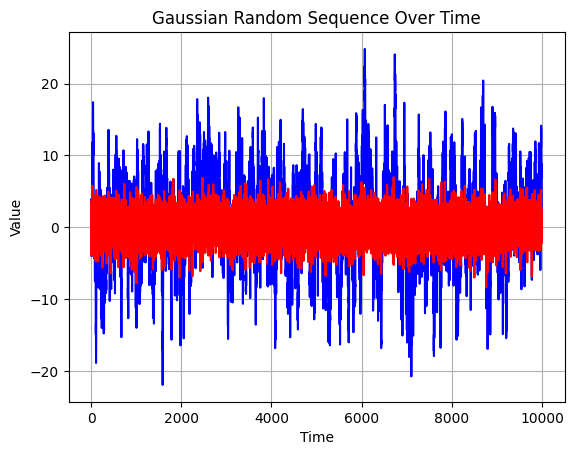

In [7]:
total_points = 10000

A = 0.95
den = [1, -A]
num = [1]
ar_sys = signal.TransferFunction(num, den, dt = 1)


mean = 0
std = 2
e = np.random.normal(mean, std, total_points)

sigma_quad = std**(2)/(1-A**2)
omega = np.linspace(-np.pi, np.pi, 10000)
Rxx_teo = (sigma_quad * (1-A**2))/(1-2*A*np.cos(omega)+A**2) 
tout, yout = signal.dlsim(ar_sys, e)

plt.figure()

plt.plot(tout, yout, linestyle='-', color='b')
plt.plot(tout, e, linestyle='-', color='r')
plt.title('Gaussian Random Sequence Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

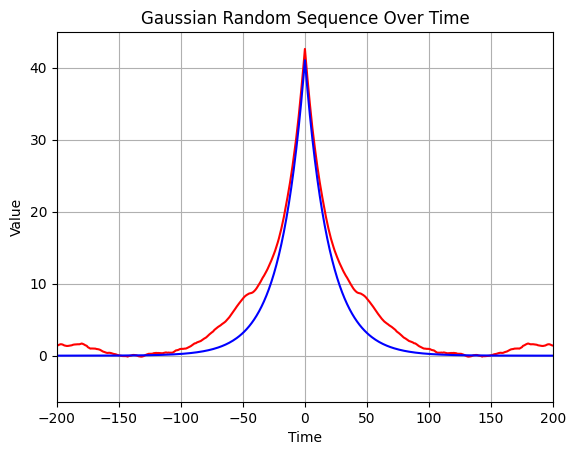

In [8]:
plt.figure()
x = yout[:, 0]
rxx = biased_autocorr(yout[:, 0])

lags = np.arange(-(len(x) - 1), (len(x) - 1) + 1)

rxx_teo  = A**(np.abs(lags))*sigma_quad
plt.cla()
plt.plot(lags, rxx, linestyle='-', color='r')
plt.plot(lags, rxx_teo, linestyle='-', color='b')
plt.title('Gaussian Random Sequence Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(-200, 200)
plt.grid(True)
plt.show()


In [9]:

def plot_psds_AR1(Rxx, w, L):
    plt.figure()
    plt.plot(w, Rxx, color = 'r')
    plt.plot(omega, Rxx_teo, color = 'b')
    plt.yscale('log')
    plt.title(f'Para L ={L}')

    pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)
    pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
    plt.xticks(pi_ticks, pi_labels)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xlim(0, np.pi)
    plt.grid(True)
    plt.show()

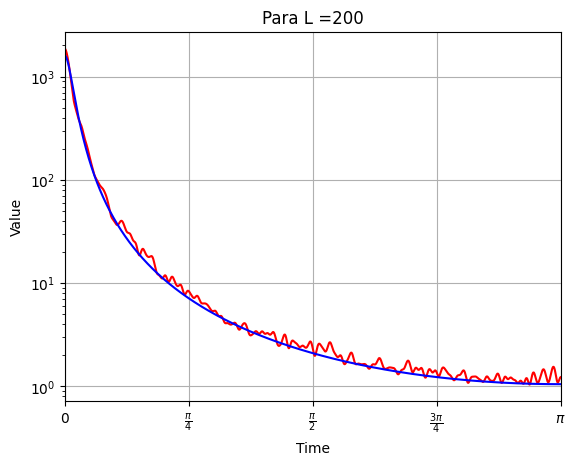

In [10]:
L = 200
Rxx, w = periodogram_smoothing(x, L, 10000)
# Calculate PSD
frequencies, psd = signal.welch(x, fs=1)
plot_psds_AR1(Rxx, w, L)

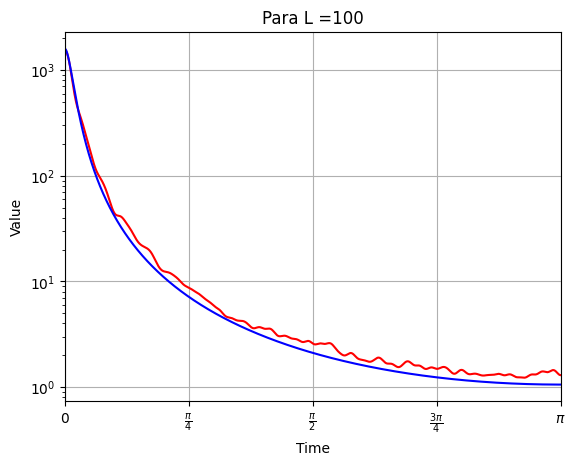

In [11]:
L = 100
Rxx, w = periodogram_smoothing(x, L, 10000)

plot_psds_AR1(Rxx, w, L)

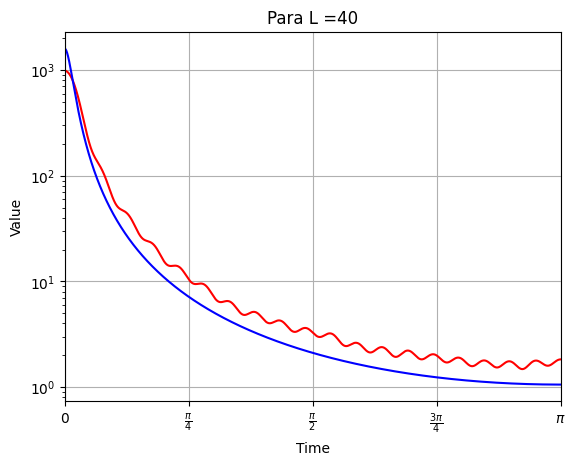

In [12]:
L = 40
Rxx, w = periodogram_smoothing(x, L, 10000)

plot_psds_AR1(Rxx, w, L)

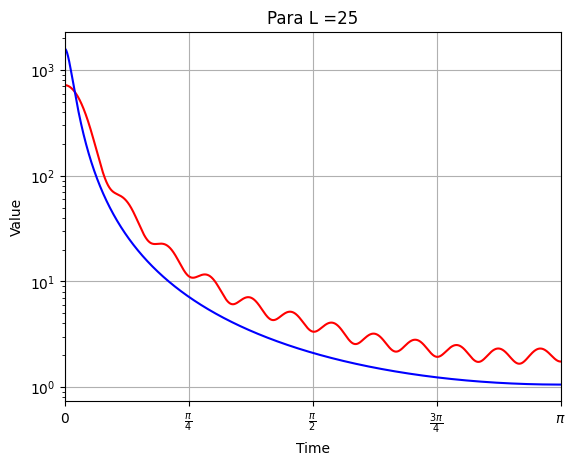

In [13]:
L = 25
Rxx, w = periodogram_smoothing(x, L, 10000)
# Calculate PSD
frequencies, psd = signal.welch(x, fs=1)
plot_psds_AR1(Rxx, w, L)

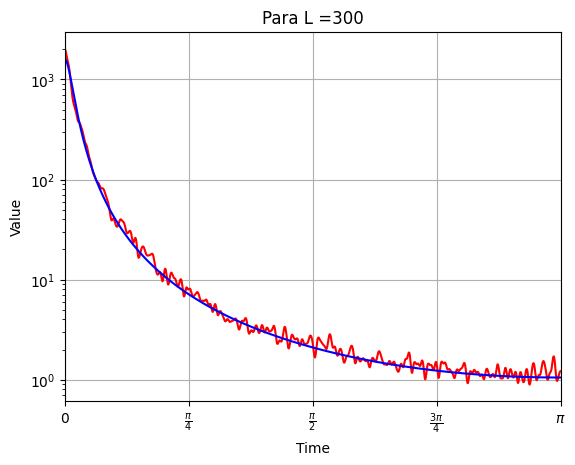

In [14]:
L = 300
Rxx, w = periodogram_smoothing(x, L, 10000)
# Calculate PSD
frequencies, psd = signal.welch(x, fs=1)
plot_psds_AR1(Rxx, w, L)

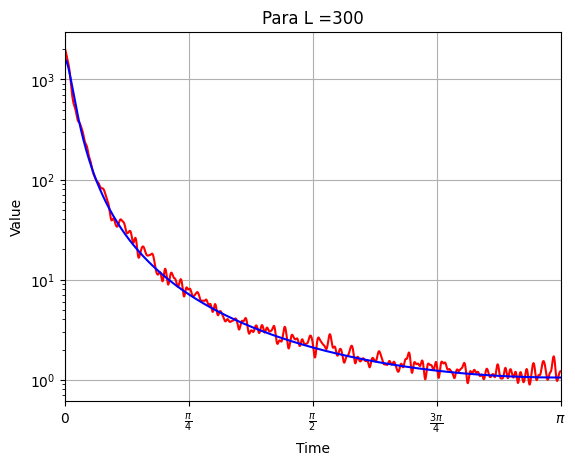

In [15]:
L = 300
Rxx, w = periodogram_smoothing(x, L, 20000)
# Calculate PSD
frequencies, psd = signal.welch(x, fs=1)
plot_psds_AR1(Rxx, w, L)

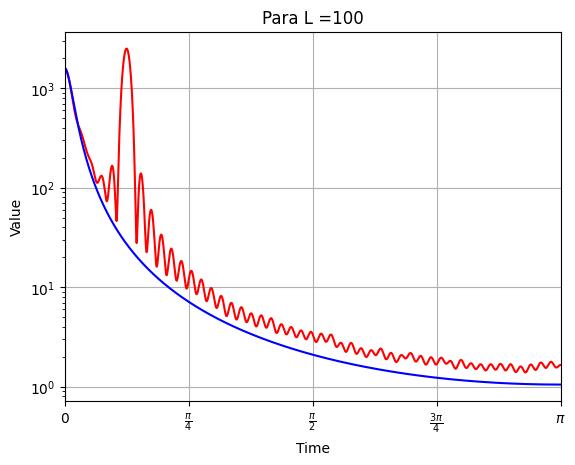

In [16]:
n = np.arange(0, len(x))
senial = x + 10*np.sin(np.pi / (8) * n)

L = 100
Rxx, w = periodogram_smoothing(senial, L, 20000)
plot_psds_AR1(Rxx, w, L)

## Nos quedamos con $L=150$

# Whitening

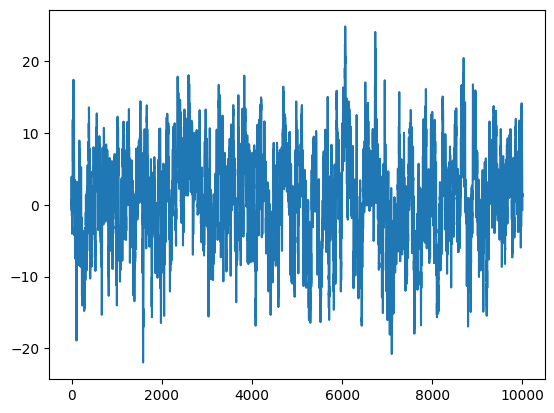

In [17]:
plt.figure()
plt.plot(x)


In [54]:
n = np.arange(0, 200, 1)
x_detect = x[0:int(len(x)/5)]
signal_ = 10*np.sin(np.pi/8 * n)
signal_ = np.pad(signal_, int((len(x_detect) - len(signal_))/2))
print(len(x_detect))
print(len(signal_))

2000
2000


In [83]:
from scipy.signal import butter, sosfreqz, sosfilt
import scipy.interpolate as inter

Nt = 1*len(x)
x_detect = x[0:int(len(x)/5)] + signal_

# take the fourier transform of the data
freqs = fft.fftshift(fft.fftfreq(Nt, 1))

#n = np.arange(0, len(x))
#senial = x + 50*np.sin(np.pi / (8) * n)
L = 300
Rxx, w = periodogram_smoothing(x, L, Nt)

hf = fft.fftshift(fft.fft(x_detect, Nt)) #* np.exp(1j*freqs*(Nt-1)/2)

#interpoler = inter.interp1d(w/(fs*2*np.pi), Rxx)
norm = 1./np.sqrt(1./(1*2))
white_hf = hf / np.sqrt(np.abs(Rxx)) * norm
white_ht = fft.ifft(fft.ifftshift(white_hf), n=Nt)

print('IMAG = ', np.any(np.iscomplex(white_ht)))

filtered_signal = sosfilt(sos, white_ht)
filtered_signal_phase = signal.filtfilt(b, a, white_ht)

plt.close()

""" plt.figure()
plt.cla()
#plt.plot(x, color =  'r')
#plt.plot(filtered_signal, color = 'r')
plt.plot(white_ht, color = 'b')
plt.xlim()
plt.show()
plt.xlim(int(len(x_detect))-50, int(len(x_detect))+50)
print('Mean = ', np.mean(white_ht[0:len(x_detect)]))
print('Std = ', np.std(white_ht[0:len(x_detect)])) """


IMAG =  True


" plt.figure()\nplt.cla()\n#plt.plot(x, color =  'r')\n#plt.plot(filtered_signal, color = 'r')\nplt.plot(white_ht, color = 'b')\nplt.xlim()\nplt.show()\nplt.xlim(int(len(x_detect))-50, int(len(x_detect))+50)\nprint('Mean = ', np.mean(white_ht[0:len(x_detect)]))\nprint('Std = ', np.std(white_ht[0:len(x_detect)])) "

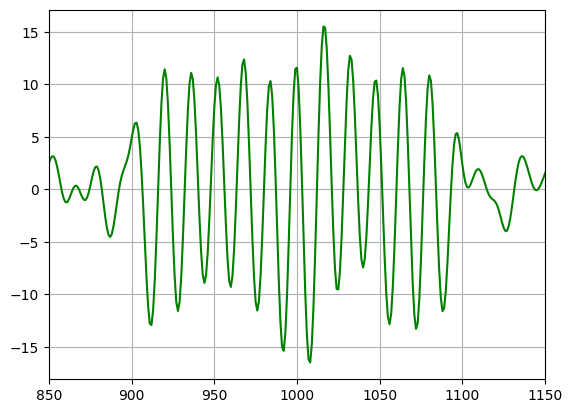

Mean =  (-0.006030018595503122-3.715083796153576e-21j)
Std =  1.4997272118172058


In [94]:
plt.figure()
#plt.plot(x, color =  'r')
#plt.plot(filtered_signal, color = 'r')
#plt.plot(x_detect, color = 'b')
#plt.plot(signal_)
#plt.plot(5*filtered_signal, color = 'r')
plt.plot(5*filtered_signal_phase, color = 'g')
plt.xlim(int(len(x_detect)/2)-150, int(len(x_detect)/2)+150)
#plt.xlim(0, len(x_detect))
plt.grid()
plt.show()
print('Mean = ', np.mean(white_ht[0:len(x_detect)]))
print('Std = ', np.std(white_ht[0:len(x_detect)]))

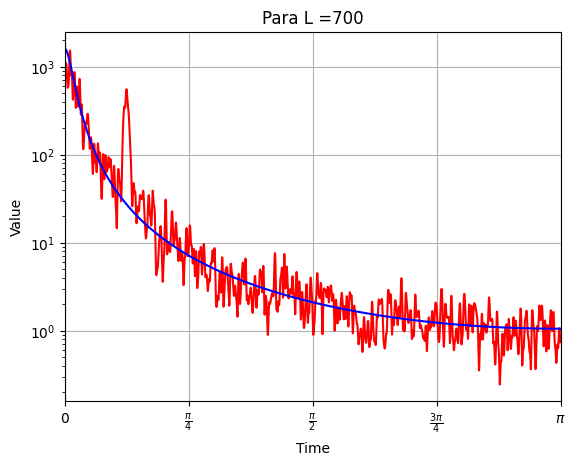

In [81]:
L = 700
RxxSen, wSen = periodogram_smoothing(x_detect, L, 20000)
plot_psds_AR1(RxxSen, wSen, L)

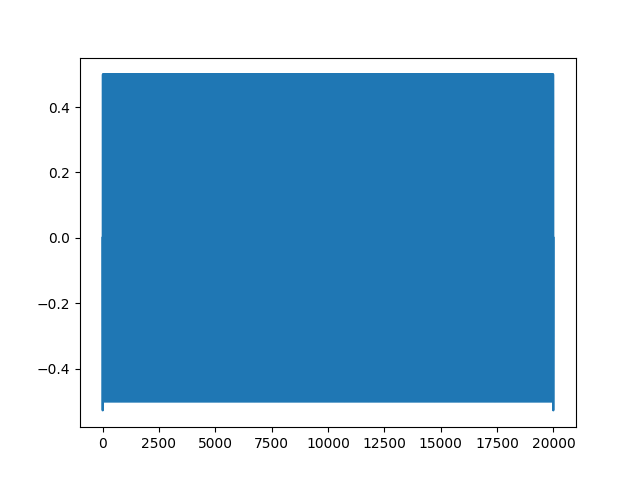

In [97]:
%matplotlib ipympl
plt.figure()
n = np.arange(0, 10000)
cocor = unbiased_autocorr(np.sin(np.pi/8 * n))
plt.plot(cocor)

c:\Users\sch_b\OneDrive\Documentos\PASA\.PASA\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


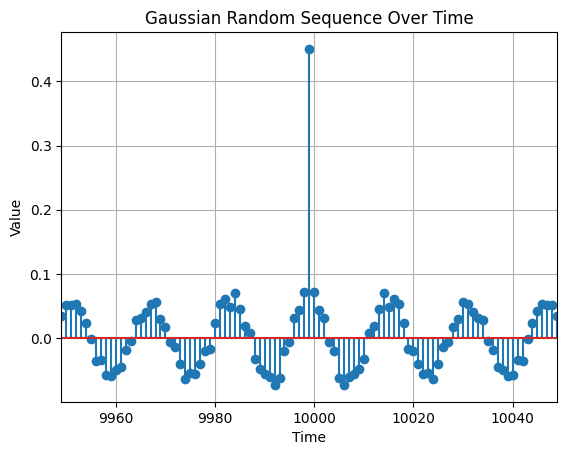

In [74]:
plt.close()
plt.cla()
plt.stem(Rww)
plt.title('Gaussian Random Sequence Over Time')
plt.xlabel('Time')
plt.xlim(len(Rww)//2 - 50, len(Rww)//2 + 50)
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Filtro

C:\Users\sch_b\AppData\Local\Temp\ipykernel_23892\724808006.py:32: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies, 20 * np.log10(magnitude_response))


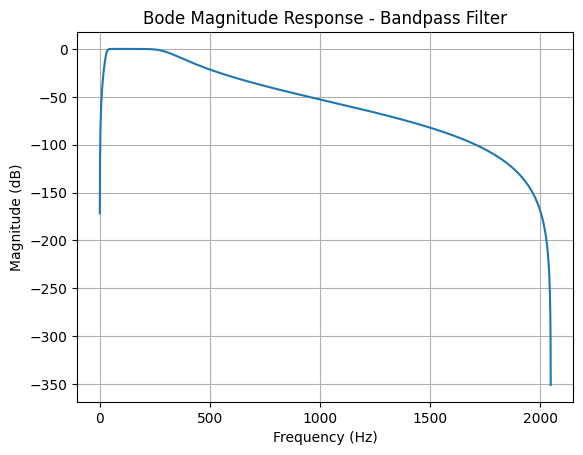

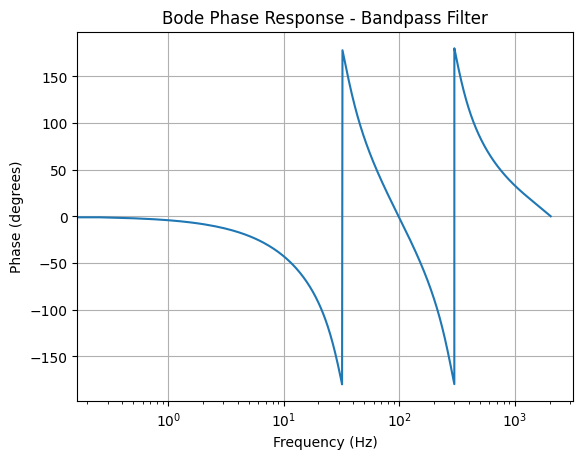

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, sosfreqz

# Define the sampling frequency and Nyquist frequency
fs = 4096  # Sampling frequency

# Define passband and stopband frequencies in Hz
low_cutoff = 32
high_cutoff = 300

# Convert frequencies to normalized frequencies (Nyquist frequency = 0.5)
nyq = 0.5 * fs
low_cutoff_norm = low_cutoff / nyq
high_cutoff_norm = high_cutoff / nyq

# Design the bandpass filter using second-order sections (SOS)
sos = butter(N=4, Wn=[low_cutoff_norm, high_cutoff_norm], btype='band', output='sos')
b, a = butter(N=4, Wn=[low_cutoff_norm, high_cutoff_norm], btype='band')



# Calculate the frequency response of the filter
frequencies, response = sosfreqz(sos, worN=8000, fs=fs)

# Extract magnitude and phase responses
magnitude_response = np.abs(response)
phase_response = np.angle(response, deg=True)

# Plot Bode magnitude response
plt.figure()
plt.plot(frequencies, 20 * np.log10(magnitude_response))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.title('Bode Magnitude Response - Bandpass Filter')
plt.show()

# Plot Bode phase response
plt.figure()
plt.semilogx(frequencies, phase_response)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)
plt.title('Bode Phase Response - Bandpass Filter')
plt.show()


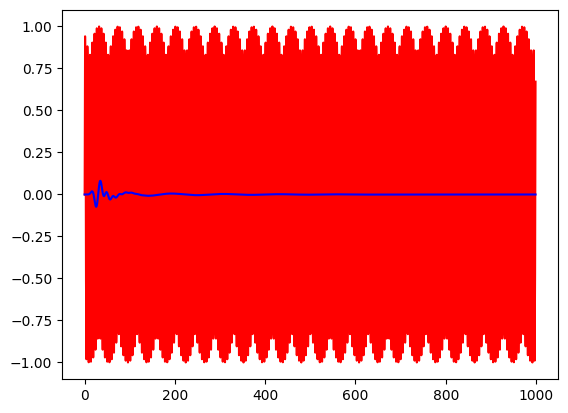

In [ ]:
n = np.arange(0, 1000)
pp = np.sin(2*np.pi*800/fs  * n)
filtered_signal = sosfilt(sos, pp)
plt.close()
plt.figure()
plt.plot(n, pp, color = 'r')
plt.plot(n, filtered_signal, color = 'b')
plt.show()

# Voy a analizar las correlaciones, entre senoide-ruido, senoide-senoide

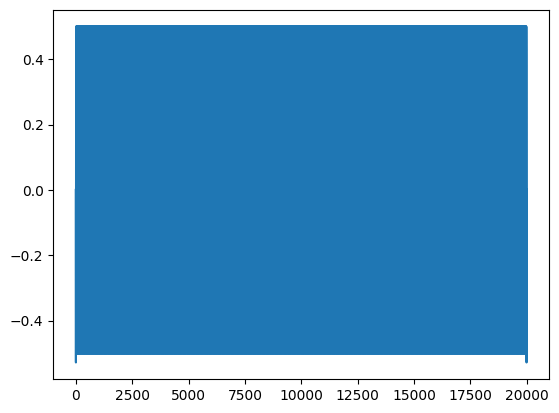

In [ ]:
n = np.arange(0, len(x))
senoidal = 1*np.sin(np.pi / (8) * n)

rss = biased_autocorr(senoidal+x)-(biased_autocorr(x) + biased_autocorr(senoidal))
plt.close()
plt.figure()
plt.plot(unbiased_autocorr(senoidal))
plt.show()

# Spectral Leakage

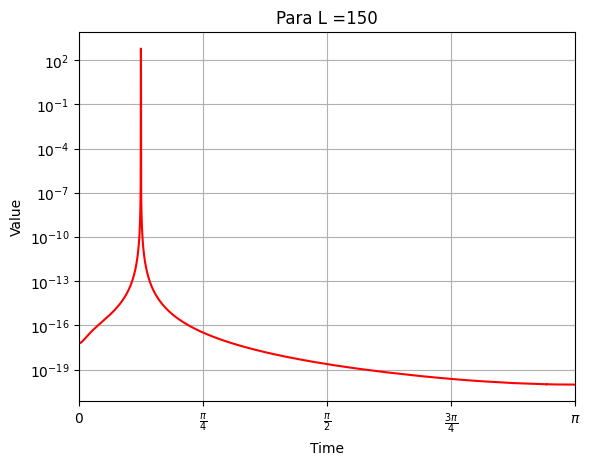

In [ ]:
window = signal.get_window(window="hann", Nx=len(senoidal), fftbins= False)


Rss, w = periodogram(senoidal * window, 10000)

S = fft.fftshift(fft.fft(senoidal, 50000))
Rss2 = np.abs(S)**(2)/len(senoidal)


plt.figure()
plt.plot(w, Rss, color = 'r')
#plt.plot(w, Rss2, color = 'b')
plt.yscale('log')
plt.title(f'Para L ={L}')

pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)
pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
plt.xticks(pi_ticks, pi_labels)
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(0, np.pi)
plt.grid(True)
plt.show()


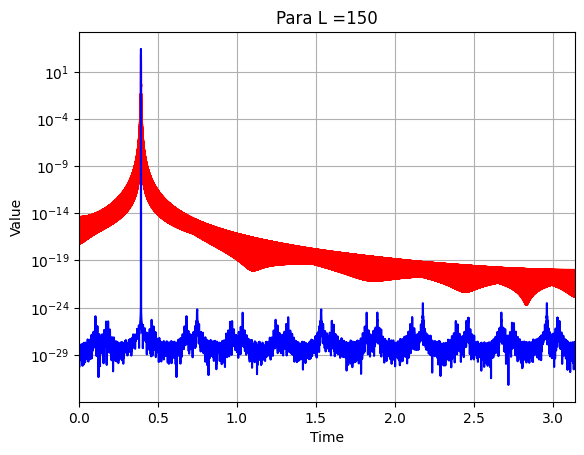

1.1779794353716648
3.141592653589793


In [ ]:
window = signal.get_window(window="hann", Nx=len(senoidal), fftbins= False)


Rss, w = periodogram(senoidal * window , 100000)

S = fft.fftshift(fft.fft(senoidal, 10000))
Rss2 = np.abs(S)**(2)/len(senoidal)


plt.figure()
plt.plot(w, Rss, color = 'r')
plt.plot(w[::10], Rss2, color = 'b')
plt.yscale('log')
plt.title(f'Para L ={L}')

#pi_ticks = np.arange(-np.pi, np.pi + 0.1, np.pi/4)
#pi_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{3\pi}{2}$',r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$', r'$\pi$']
#plt.xticks(pi_ticks, pi_labels)
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(0, np.pi)
plt.grid(True)
plt.show()
print(np.trapz(Rss, w))
print(np.trapz(Rss2, w[::10]))


# ATENCION ATENCION, SI YO TENGO LA PSD ESTACIONARIA, TENGO MI FILTRO
# LUEGO SACO 